In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg

# Генеруємо AR(1) процес
np.random.seed(42)  # Фіксуємо seed для відтворюваності результатів
n = 100  # Кількість точок у часовому ряді


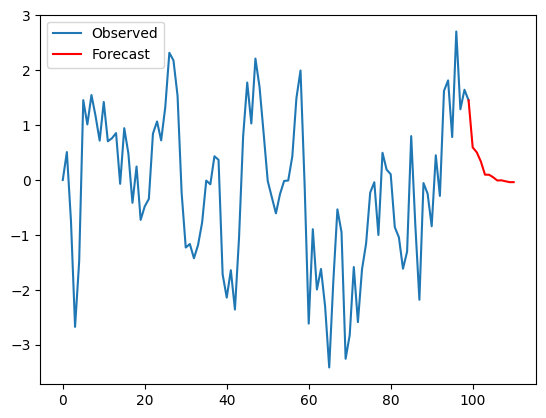

In [ ]:
phi = 0.7  # Коефіцієнт авторегресії, що визначає зв'язок між поточним і попереднім значенням
y = [0]  # Ініціалізуємо часовий ряд початковим значенням 0

# Генеруємо часовий ряд з AR(1) процесом
for t in range(1, n):
	# Поточне значення залежить від попереднього (y[t-1]) з додаванням випадкового шуму
	y.append(phi * y[t-1] + np.random.normal())  # np.random.normal() додає випадковий шум

# Перетворюємо список значень у numpy масив для подальшої обробки
y = np.array(y)

# Створюємо та навчаємо авторегресійну модель
model = AutoReg(y, lags=5)  # AR(1) модель з використанням одного лагу (попереднє значення)
model_fit = model.fit()  # Навчання моделі на даних

# Прогнозуємо на майбутні 10 кроків
y_forecast = model_fit.predict(start=len(y), end=len(y)+10)  # Прогноз від поточного моменту до +10 кроків

# Візуалізуємо результати
plt.plot(np.arange(len(y)), y, label='Observed')  # Фактичні дані
forecast_with_last = np.concatenate([[y[-1]], y_forecast])  # 1 фактичне + 11 прогнозованих = 12
plt.plot(np.arange(len(y)-1, len(y)+11), forecast_with_last, label='Forecast', color='red')  # X: 12 точок
plt.legend()
plt.show()


In [ ]:
from diffusers import StableDiffusionPipeline

# Load the model
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")

# Generate an image from a text prompt
prompt = "handwritten number 5"
image = pipe(prompt).images[0]

# Save the generated image
image.save("generated_image.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]